QAUNTIUM TASK part1

Analyze transaction and customer data to identify trends and inconsistencies. 
Develop metrics and examine sales drivers to gain insights into overall sales performance. 
Create visualizations and prepare findings to formulate a clear recommendation for the client's strategy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings

warnings.filterwarnings("ignore")

In [9]:
# QVI_transaction_data.xlsx
df1 = pd.read_excel('K:\Data Analitics learning\Quantum\QVI_transaction_data.xlsx')
df1.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
#QVI_purchase_behaviour.csv
df2 = pd.read_csv('K:\Data Analitics learning\Quantum\QVI_purchase_behaviour.csv')
df2.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [11]:
df1.shape

(264836, 8)

In [12]:
df1.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [13]:
# comparing two  columns with the same name in 2 tables for definition which type of join we need to use
display(df1['LYLTY_CARD_NBR'].nunique(), df2['LYLTY_CARD_NBR'].nunique())

72637

72637

In [14]:
# Making  joins of 2 tables 
df = pd.merge(df1, df2, how='inner', on='LYLTY_CARD_NBR')
df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [15]:
df.nunique()

DATE                   364
STORE_NBR              272
LYLTY_CARD_NBR       72637
TXN_ID              263127
PROD_NBR               114
PROD_NAME              114
PROD_QTY                 6
TOT_SALES              112
LIFESTAGE                7
PREMIUM_CUSTOMER         3
dtype: int64

In [16]:
df.shape

(264836, 10)

In [17]:
# searching for duplicates rows
df[df.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
126410,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium


In [18]:
# removing duplicates rows
df = df.drop_duplicates()

In [19]:
df.shape

(264835, 10)

In [20]:
# Using a sort to define why so big value in max(TOT_SALES) 
a= df
a.sort_values(by='TOT_SALES', ascending=False).head(15)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
71457,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
71456,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
185396,43605,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,YOUNG FAMILIES,Budget
5745,43327,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,MIDAGE SINGLES/COUPLES,Mainstream
151907,43605,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,RETIREES,Mainstream
119732,43604,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,OLDER SINGLES/COUPLES,Premium
69782,43327,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,OLDER FAMILIES,Premium
57478,43599,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,OLDER FAMILIES,Mainstream
171914,43329,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,RETIREES,Premium
136109,43327,101,101110,100677,16,Smiths Crinkle Chips Salt & Vinegar 330g,5,28.5,RETIREES,Budget


1) Explore which category of custumers, based on premium status, brings in more income

In [21]:
# Using group by to define which custumers done more purchases in depends of colums 'PREMIUM_CUSTOMER' 
a=df.groupby(['PREMIUM_CUSTOMER'],as_index = False).sum('TOT_SALES')
a.head()

,PREMIUM_CUSTOMER,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,Budget,4048992539,12568324,12618536184,12574511462,5282919,177898,676211.55
1,Mainstream,4432810553,13779828,13829695818,13789459221,5754963,193965,750744.50
2,Premium,3028995041,9425817,9450042107,9430707258,3947330,133259,507452.95


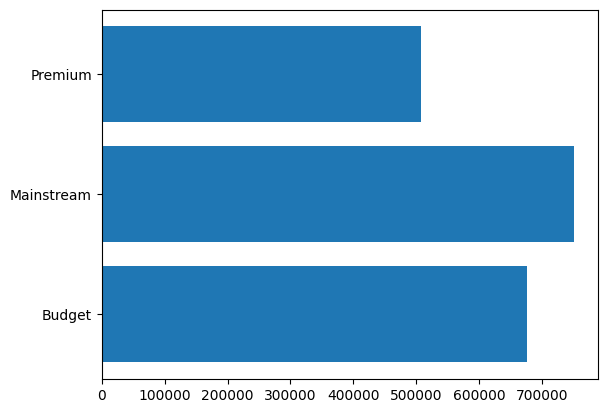

In [22]:
plt.barh(a["PREMIUM_CUSTOMER"], a["TOT_SALES"])
plt.show()

In [ ]:
# as we can see the category of custumers 'Mainstream' is done more purchases then others 

2) Explore which category of custumers, based on LIFESTAGE status, brings in more income

In [23]:
a=df.groupby(['LIFESTAGE'],as_index = False).sum('TOT_SALES')

In [24]:
a.head()

,LIFESTAGE,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,MIDAGE SINGLES/COUPLES,1091384335,3406542,3420200402,3412143988,1415274,47721,184751.30
1,NEW FAMILIES,300742058,925551,926940419,926468137,391231,12847,50433.45
2,OLDER FAMILIES,2112175370,6520066,6536872564,6520306382,2755875,94992,353767.20
3,OLDER SINGLES/COUPLES,2367796339,7301416,7336586485,7305101915,3080009,104201,402420.75
4,RETIREES,2162904343,6775695,6798716405,6779576026,2807444,94166,366470.90


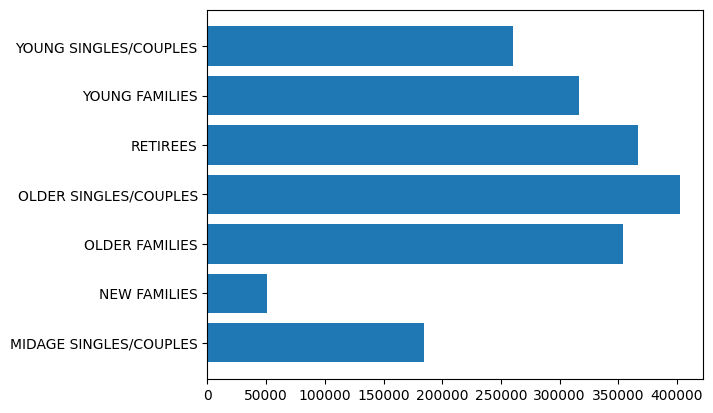

In [25]:
plt.barh(a["LIFESTAGE"], a["TOT_SALES"])
plt.show()

In [ ]:
# as we can see the category of custumers 'OLDER SINGLES/COUPLES', 'RETIREES', 'OLDER FAMILIES' are TOP buyers 

3) Explore which PROD_NAME custumers likes the most by quantity and total sales

In [26]:
df['PROD_NAME'].nunique()

114

In [27]:
# Exploring the quantity of each PROD_NAME 
a=df.groupby(['PROD_NAME'],as_index = False).count()

In [28]:
a.head(10)

,PROD_NAME,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,Burger Rings 220g,1564,1564,1564,1564,1564,1564,1564,1564,1564
1,CCs Nacho Cheese 175g,1498,1498,1498,1498,1498,1498,1498,1498,1498
2,CCs Original 175g,1514,1514,1514,1514,1514,1514,1514,1514,1514
3,CCs Tasty Cheese 175g,1539,1539,1539,1539,1539,1539,1539,1539,1539
4,Cheetos Chs & Bacon Balls 190g,1479,1479,1479,1479,1479,1479,1479,1479,1479
5,Cheetos Puffs 165g,1448,1448,1448,1448,1448,1448,1448,1448,1448
6,Cheezels Cheese 330g,3149,3149,3149,3149,3149,3149,3149,3149,3149
7,Cheezels Cheese Box 125g,1454,1454,1454,1454,1454,1454,1454,1454,1454
8,Cobs Popd Sea Salt Chips 110g,3265,3265,3265,3265,3265,3265,3265,3265,3265
9,Cobs Popd Sour Crm &Chives Chips 110g,3159,3159,3159,3159,3159,3159,3159,3159,3159


In [29]:
# TOP 15 products by sales quantity
a1 = a[['PROD_NAME','PROD_QTY']].sort_values(by='PROD_QTY', ascending=False).head(15)
a1

,PROD_NAME,PROD_QTY
33,Kettle Mozzarella Basil & Pesto 175g,3304
42,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
10,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
102,Tyrrells Crisps Ched & Chives 165g,3268
8,Cobs Popd Sea Salt Chips 110g,3265
30,Kettle 135g Swt Pot Sea Salt,3257
98,Tostitos Splash Of Lime 175g,3252
28,Infuzions Thai SweetChili PotatoMix 110g,3242
86,Smiths Crnkle Chip Orgnl Big Bag 380g,3233
95,Thins Potato Chips Hot & Spicy 175g,3229


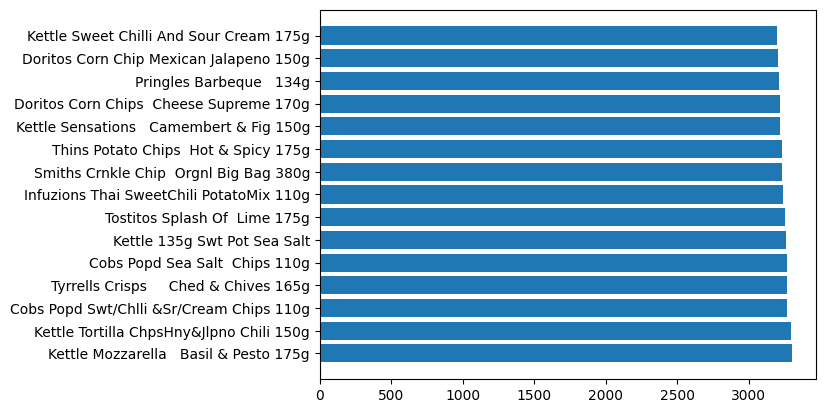

In [30]:
plt.barh(a1["PROD_NAME"], a1["PROD_QTY"])
plt.show()

In [31]:
# Exploring the TOT_SALES of each PROD_NAME 
a=df.groupby(['PROD_NAME'],as_index = False).sum('TOT_SALES')

In [32]:
# TOP 15 products by TOT_SALES
a1 = a[['PROD_NAME','TOT_SALES']].sort_values(by='TOT_SALES', ascending=False).head(15)
a1

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
33,Kettle Mozzarella Basil & Pesto 175g,34457.4
76,Smiths Crinkle Original 330g,34302.6
6,Cheezels Cheese 330g,34296.9
12,Doritos Cheese Supreme 330g,33390.6
39,Kettle Sweet Chilli And Sour Cream 175g,33031.8
34,Kettle Original 175g,32740.2
35,Kettle Sea Salt And Vinegar 175g,32589.0


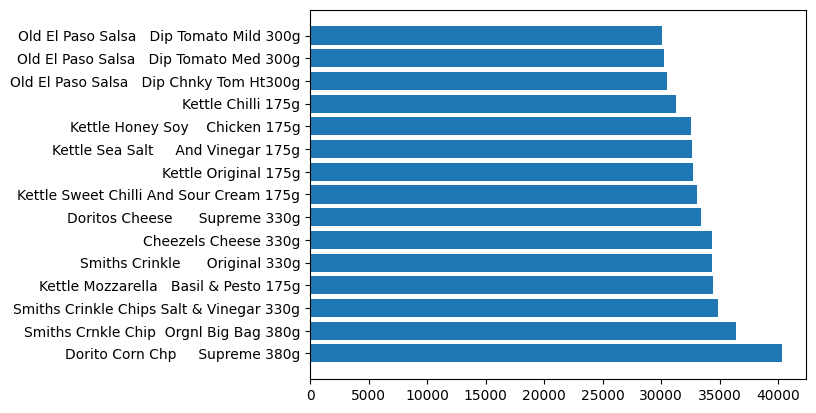

In [33]:
plt.barh(a1["PROD_NAME"], a1["TOT_SALES"])
plt.show()

In [34]:
# Worst 15 products by TOT_SALES
a1 = a[['PROD_NAME','TOT_SALES']].sort_values(by='TOT_SALES', ascending=True).head(15)
a1

,PROD_NAME,TOT_SALES
112,Woolworths Medium Salsa 300g,4050.0
113,Woolworths Mild Salsa 300g,4234.5
105,WW Crinkle Cut Original 175g,4532.2
90,Sunbites Whlegrn Crisps Frch/Onin 90g,4600.2
104,WW Crinkle Cut Chicken 175g,4702.2
89,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,5076.2
111,Woolworths Cheese Rings 190g,5169.6
106,WW D/Style Chip Sea Salt 200g,5249.7
109,WW Sour Cream &OnionStacked Chips 160g,5323.8
108,WW Original Stacked Chips 160g,5323.8


4) Searching for TOP 10 custumers and best client

In [35]:
a=df.groupby(['LYLTY_CARD_NBR'],as_index = False).sum('TOT_SALES')

In [36]:
a.shape

(72637, 7)

In [37]:
a2=a.sort_values(by='TOT_SALES', ascending=False).head(10)

In [38]:
a2['LYLTY_CARD_NBR']=a2['LYLTY_CARD_NBR'].astype(str)

In [39]:
a2.head(15)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
59694,226000,86936,452,452411,8,400,1300.00
60925,230078,739222,3910,3951218,856,36,138.60
17292,63197,652573,945,910245,938,32,132.80
69017,259009,651936,3885,3861932,762,30,127.20
42813,162039,782887,2916,2916981,1155,36,126.80
16001,58361,608651,812,761800,769,28,124.80
61001,230154,608681,3220,3261461,625,32,124.40
25958,94185,695179,1504,1498257,961,32,122.80
35338,130090,608525,1820,1876357,502,27,122.65
47959,179228,695519,2864,2893048,871,32,120.80


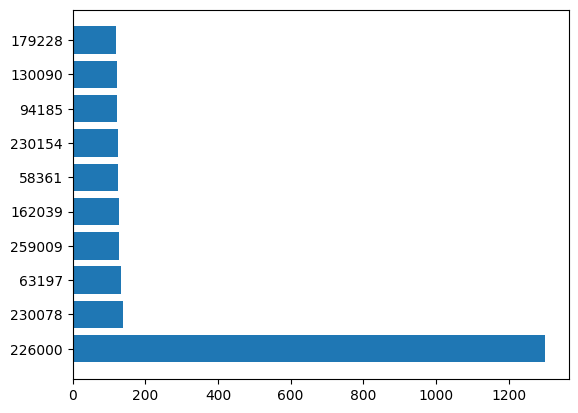

In [40]:
plt.barh(a2["LYLTY_CARD_NBR"], a2["TOT_SALES"])
plt.show()

In [ ]:
# Custumer with LYLTY_CARD_NBR = 226000 made a maximum purchases

In [41]:
# Who is this customer with LYLTY_CARD_NBR = 226000
df.loc[(df['LYLTY_CARD_NBR']== 226000)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
71456,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
71457,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


5) TOP 10 stores with the best TOT_SALES?

In [42]:
a= df.groupby(['STORE_NBR'],as_index = False).sum('TOT_SALES')
a.head()

,STORE_NBR,DATE,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,1,24903090,720905,170547,32795,704,2393.60
1,2,21995230,1135736,428301,28482,564,2005.80
2,3,65280442,4779490,2814116,82791,2915,12802.45
3,4,72922697,7025622,5862568,91820,3316,14647.65
4,5,59152546,6964664,6888021,78636,2704,9500.80


In [43]:
a1 = a.sort_values(by='TOT_SALES', ascending=False).head(10)
a1

,STORE_NBR,DATE,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
225,226,87889094,457359602,459492970,111033,4401,18905.45
87,88,81408811,190439625,167279872,100234,3718,16333.25
164,165,79066812,300487745,302497453,96027,3602,15973.75
39,40,76676422,70905786,65290645,97884,3499,15559.50
236,237,77575204,428548619,428905021,97660,3515,15539.50
57,58,75747150,101446690,93618477,97348,3463,15251.45
198,199,73324132,336035549,334717662,94196,3343,14797.00
3,4,72922697,7025622,5862568,91820,3316,14647.65
202,203,72186646,337514610,337410695,90919,3287,14551.60
25,26,71282534,42949845,37871684,89912,3256,14469.30


In [44]:
a1["STORE_NBR"] = a1['STORE_NBR'].astype(str)

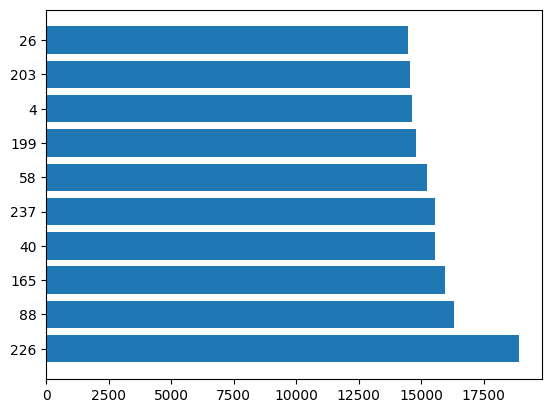

In [45]:
plt.barh(a1["STORE_NBR"], a1["TOT_SALES"])
plt.show()

In [ ]:
# STORE 226 has the best sales

TOT_SALES of all stores

In [46]:
a= df.groupby(['STORE_NBR'],as_index = False).sum('TOT_SALES')
a.head()

,STORE_NBR,DATE,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,1,24903090,720905,170547,32795,704,2393.60
1,2,21995230,1135736,428301,28482,564,2005.80
2,3,65280442,4779490,2814116,82791,2915,12802.45
3,4,72922697,7025622,5862568,91820,3316,14647.65
4,5,59152546,6964664,6888021,78636,2704,9500.80


In [47]:
a1 = a.sort_values(by='TOT_SALES', ascending=False)
a1.head()

,STORE_NBR,DATE,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
225,226,87889094,457359602,459492970,111033,4401,18905.45
87,88,81408811,190439625,167279872,100234,3718,16333.25
164,165,79066812,300487745,302497453,96027,3602,15973.75
39,40,76676422,70905786,65290645,97884,3499,15559.50
236,237,77575204,428548619,428905021,97660,3515,15539.50


In [48]:
a1["STORE_NBR"] = a1['STORE_NBR'].astype(str)

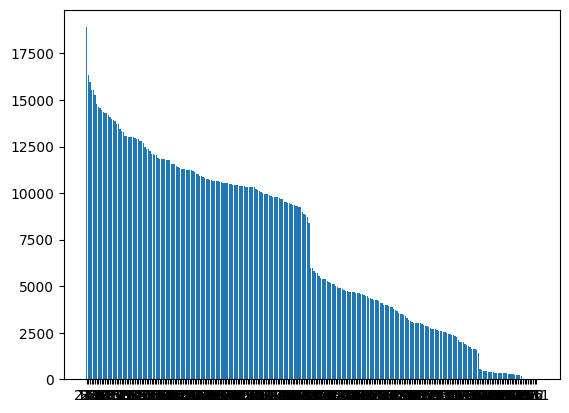

In [49]:
plt.bar(a1["STORE_NBR"], a1["TOT_SALES"])
plt.show()

In [ ]:
# as we can see some of stores in a bottom line of the list, lets find out what are this stores..

6) TOP 10 stores with the lowest TOT_SALES.

In [50]:
a1 = a.sort_values(by='TOT_SALES', ascending=True).head(10)
a1.head(10)

,STORE_NBR,DATE,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
210,211,86863,422642,421031,142,2,5.2
75,76,43394,76037,74909,45,2,6.0
10,11,86843,22746,21015,133,2,6.7
251,252,86859,504744,507051,94,2,7.4
205,206,86861,412205,409157,62,2,7.6
91,92,43526,92263,90568,60,2,9.2
192,193,130616,579724,579900,271,4,13.1
84,85,129872,255811,252405,217,5,13.9
30,31,86759,62338,55949,120,4,14.8
116,117,1998892,5394078,5550797,2752,47,161.8


In [51]:
a1["STORE_NBR"] = a1['STORE_NBR'].astype(str)

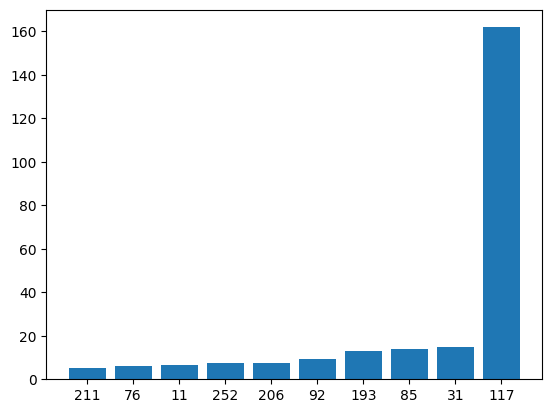

In [52]:
plt.bar(a1["STORE_NBR"], a1["TOT_SALES"])
plt.show()

7) Dependence of TOT_SALES on DATE

In [53]:
a= df.groupby(['DATE'],as_index = False).sum('TOT_SALES')
a.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43282,96529,96647678,96468206,42063,1394,5372.2
1,43283,93589,93701840,93577472,40201,1367,5315.4
2,43284,99862,99982192,100010549,41718,1389,5321.8
3,43285,98046,98163455,98056784,40356,1373,5309.9
4,43286,96886,96998859,96977337,42266,1358,5080.9


In [54]:
a1 = a.sort_values(by='DATE', ascending=True)
a1.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43282,96529,96647678,96468206,42063,1394,5372.2
1,43283,93589,93701840,93577472,40201,1367,5315.4
2,43284,99862,99982192,100010549,41718,1389,5321.8
3,43285,98046,98163455,98056784,40356,1373,5309.9
4,43286,96886,96998859,96977337,42266,1358,5080.9
5,43287,103248,103372204,103267244,42451,1466,5604.9
6,43288,98497,100868885,98683178,41930,1444,5378.3
7,43289,91768,91881930,91827143,40091,1336,5021.1
8,43290,102610,102736146,102757536,41484,1441,5518.9
9,43291,98532,98653731,98672961,40700,1338,5068.5


In [55]:
a1["DATE"] = a1['DATE'].astype(str)

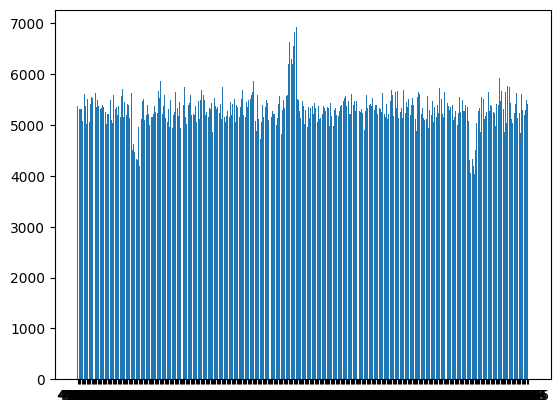

In [56]:
plt.bar(a1["DATE"], a1["TOT_SALES"])
plt.show()

In [ ]:
# The graph shows couple failures and one rise

In [57]:
a["DATE"] = a['DATE'].astype(int)

In [58]:
a['DATE'] = pd.to_datetime(a['DATE'], unit='D', origin='1899-12-30')

In [59]:
a

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,2018-07-01,96529,96647678,96468206,42063,1394,5372.2
1,2018-07-02,93589,93701840,93577472,40201,1367,5315.4
2,2018-07-03,99862,99982192,100010549,41718,1389,5321.8
3,2018-07-04,98046,98163455,98056784,40356,1373,5309.9
4,2018-07-05,96886,96998859,96977337,42266,1358,5080.9
...,...,...,...,...,...,...,...
359,2019-06-26,97548,99081307,97353705,40455,1380,5305.0
360,2019-06-27,92804,92923154,92809584,39675,1352,5202.8
361,2019-06-28,100656,101480076,100725293,41953,1400,5299.6
362,2019-06-29,99608,102628409,99551543,40290,1438,5497.6


8) Dependence of TOT_SALES on DATE grouping by month

In [60]:
df["DATE"] = df['DATE'].astype(int)

In [61]:
# converting 'DATE' to datemtime 
df['DATE'] = pd.to_datetime(df['DATE'], unit='D', origin='1899-12-30')

In [62]:
df['DATE']

0        2018-10-17
1        2019-05-14
2        2018-11-10
3        2019-03-09
4        2019-05-20
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264835, dtype: datetime64[ns]

In [63]:
a = df.sort_values(by='DATE', ascending=True)
a.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
151701,2018-07-01,109,109019,110294,34,Pringles Slt Vingar 134g,2,7.4,RETIREES,Mainstream
231139,2018-07-01,47,47288,42735,97,RRD Salt & Vinegar 165g,2,6.0,YOUNG SINGLES/COUPLES,Budget
66670,2018-07-01,203,203074,202617,34,Pringles Slt Vingar 134g,2,7.4,OLDER FAMILIES,Mainstream
246424,2018-07-01,81,81326,81176,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Mainstream
127720,2018-07-01,129,129046,132474,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2,OLDER SINGLES/COUPLES,Premium
67640,2018-07-01,225,225077,225120,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2,OLDER FAMILIES,Mainstream
10209,2018-07-01,84,84317,84019,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,MIDAGE SINGLES/COUPLES,Mainstream
132263,2018-07-01,216,216358,216188,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,OLDER SINGLES/COUPLES,Premium
221484,2018-07-01,65,65015,61737,17,Kettle Sensations BBQ&Maple 150g,2,9.2,YOUNG FAMILIES,Premium
18527,2018-07-01,4,4247,3773,23,Cheezels Cheese 330g,1,5.7,MIDAGE SINGLES/COUPLES,Premium


In [64]:
a['DATE'] = a['DATE'].dt.month

In [65]:
a.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
151701,7,109,109019,110294,34,Pringles Slt Vingar 134g,2,7.4,RETIREES,Mainstream
231139,7,47,47288,42735,97,RRD Salt & Vinegar 165g,2,6.0,YOUNG SINGLES/COUPLES,Budget
66670,7,203,203074,202617,34,Pringles Slt Vingar 134g,2,7.4,OLDER FAMILIES,Mainstream
246424,7,81,81326,81176,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Mainstream
127720,7,129,129046,132474,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2,OLDER SINGLES/COUPLES,Premium


In [67]:
a1= a.groupby(['DATE'],as_index = False).sum('TOT_SALES')
a1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,1,2975778,2979395533,2976466341,1255743,42501,162642.30
1,2,2767238,2771540398,2769802590,1151292,39220,150665.00
2,3,3060869,3064783365,3062554866,1283571,43347,166265.20
3,4,2939472,2943233146,2940186982,1227901,41825,159845.10
4,5,3024412,3028036666,3025685990,1262423,41300,157367.65
5,6,2950362,2969233373,2951278706,1223564,41852,160538.60
6,7,3053730,3068665884,3055387824,1281140,43242,165275.30
7,8,3018278,3029249164,3020516599,1265707,41484,158731.05
8,9,2920876,2935684743,2921341503,1232717,41792,160522.00
9,10,3009808,3022559653,3011582389,1263597,42819,164409.70


In [68]:
a1["DATE"] = a1['DATE'].astype(str)

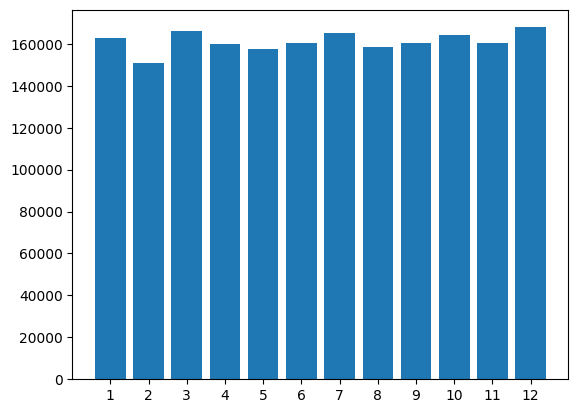

In [69]:
plt.bar(a1["DATE"], a1["TOT_SALES"])
plt.show()

In [ ]:
# best sales on 12 month - December
# worst sales on 2 month - February

Conlusions

All the best
1) Best costumers in Mainstream group
2) Best costumers based on LIFESTAGE status is OLDER SINGLES/COUPLES
3) Top product is Dorito Corn Chp Supreme 380g
4) Store with number 226 have done the best sales
5) Best month for sales is December

All the worst
1) Worst costumers in Premium group
2) Worst costumers based on LIFESTAGE status is NEW FAMILIES
3) Worst product is Woolworths Medium Salsa 300g
4) Store with number 211 have done the worst sales
5) Worst month for sales is February